# Montgomerty County, Maryland - Traffic Violation Data Analysis

### Data Sourced from Montgomerty County, Maryland of all electronic traffic violations. Using the vehicle data and the information that describes attributes of the violation and the offender, we can assess a variety of questions categorizing what car brands and drivers are up to. 

## Data Loading and Cleaning 

In [1]:
import numpy as np
import pandas as pd                # to import data
import seaborn as sns              # to visualize
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Traffic_Violations.csv')
df.isnull().sum()                   # total missing values in each var


SeqID                            0
Date Of Stop                     0
Time Of Stop                     0
Agency                           0
SubAgency                        0
Description                     10
Location                         4
Latitude                         0
Longitude                        0
Accident                         0
Belts                            0
Personal Injury                  0
Property Damage                  0
Fatal                            0
Commercial License               0
HAZMAT                           0
Commercial Vehicle               0
Alcohol                          0
Work Zone                        0
Search Conducted            720509
Search Disposition         1814062
Search Outcome              739777
Search Reason              1814062
Search Reason For Stop      720787
Search Type                1814070
Search Arrest Reason       1840757
State                           59
VehicleType                      0
Year                

In [3]:
## Dropping unnecessary Columns that have excessive missing values
df.drop(df.columns[[0,2,3,4,5,7,8,19,20,21,22,23,24,25,31,34,42]], axis=1,inplace=True)
df.isnull().sum()  
df = df.dropna()

#### This is a huge dataset with many user inputs that result in Na values. I removed columns with a large amount of missing data that I couldn't find a use for anyway.  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886923 entries, 0 to 1898950
Data columns (total 26 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Date Of Stop             object 
 1   Location                 object 
 2   Accident                 object 
 3   Belts                    object 
 4   Personal Injury          object 
 5   Property Damage          object 
 6   Fatal                    object 
 7   Commercial License       object 
 8   HAZMAT                   object 
 9   Commercial Vehicle       object 
 10  Alcohol                  object 
 11  Work Zone                object 
 12  State                    object 
 13  VehicleType              object 
 14  Year                     float64
 15  Make                     object 
 16  Model                    object 
 17  Violation Type           object 
 18  Charge                   object 
 19  Contributed To Accident  bool   
 20  Race                     object 
 21  Gender  

#### Variables are mostly Categorical type, so not much statistics can be created with the data, but we can still graph and analyze relationships between variables. 

In [5]:
#Standardizing User input car makes to major brands 
Make = df["Make"]
Toyota = Make.str.contains("TOY")
Honda = Make.str.contains("HON")
Mazda = Make.str.contains("MAZ")|Make.str.contains("MZD")
Nissan = Make.str.contains("NISS")
Subaru = Make.str.contains("SUB")
Infiniti = Make.str.contains("INF")
Lexus = Make.str.contains("LEX")
Acura = Make.str.contains("AC")
Hyundai = Make.str.contains("HYUN")
Kia = Make.str.contains("KIA")
Dodge = Make.str.contains("DOD")
Chevy = Make.str.contains("CH")
Ford = Make.str.contains("FOR")
Volkswagen = Make.str.contains("VOLK")|Make.str.contains("WAG")
Mercedes = Make.str.contains("MER")|Make.str.contains("BEN")|Make.str.contains("GLC300")
BMW = Make.str.contains("BMW")
Volvo = Make.str.contains("VOLV")
Tesla = Make.str.contains("TES")



In [6]:
df["Make"] = np.where(Toyota, "TOYOTA", np.where(Honda, "HONDA",np.where(Mazda, "MAZDA", np.where(Nissan, "NISSAN",
np.where(Subaru, "SUBARU", np.where(Infiniti, "INFINITI", np.where(Lexus, "LEXUS", np.where(Acura, "ACURA",np.where(Hyundai, "HYUNDAI",
np.where(Kia, "KIA",np.where(Dodge, "DODGE",np.where(Chevy, "CHEVY",np.where(Ford, "FORD",np.where(Volkswagen, "VOLKSWAGEN",
np.where(Mercedes, "MERCEDES",np.where(BMW, "BMW",np.where(Volvo,"VOLVO",np.where(Tesla,"TESLA", pd.NaT ))))))))))))))))))
df["Make"].tail()

1898946     CHEVY
1898947     HONDA
1898948    TOYOTA
1898949    TOYOTA
1898950     ACURA
Name: Make, dtype: object

#### It was necessary to standardize user input Car Makes, to work with and assess the data. Then I dropped entries that were not picked up by these major brand variables I created, which leads to a loss of 241,384 cases or about 12.71% of all cases, but still leaving us with a very large and more organized data set from which to analyze. 

In [7]:
df = df.dropna()

In [8]:
df[["Make", "Model"]].head(100)

,Make,Model
0,CHEVY,CRUZ
1,TOYOTA,COROLLA
2,TOYOTA,COROLLA
3,TOYOTA,HB
4,SUBARU,ECLIPSE CROSS
...,...,...
100,BMW,X6
106,HONDA,CRV
107,HONDA,CRV
108,HONDA,CIVIC


In [9]:
#Creating a Month Column 
df["Month"] = df['Date Of Stop'].str[0:2]
df["Month"] = df["Month"].astype(int)
df.head(5)

,Date Of Stop,Location,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,...,Violation Type,Charge,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Month
0,05/01/2023,BRIGGS CHANEY RD @ COLUMIBA PIKE,No,No,No,No,No,No,No,No,...,Citation,13-401(b1),False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,5
1,11/25/2023,GEORGIA AVE / WEISMAN RD,No,No,No,No,No,No,No,No,...,Citation,13-409(b),False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,11
2,11/25/2023,GEORGIA AVE / WEISMAN RD,No,No,No,No,No,No,No,No,...,Citation,13-411(f),False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,11
3,11/26/2023,3803 WELLER RD,No,No,No,Yes,No,No,No,No,...,Citation,21-902(a1i),False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,11
4,11/25/2023,OLNEY LAYTONSVILLE RD @ FIELDCREST RD,No,No,No,No,No,No,No,No,...,Citation,21-901.1(a),False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,11


In [10]:
df.shape

(1657566, 27)

### Some light EDA 
##### To assess which brands are misbehaving, we need to narrow our focus to the most important, usable variables. Among the ones in the dataset, the vast majority are Qualitative, which will reduce the variety of graphs and visualizations we can create. The variables I have settled on exploring though are "Accident", "Alcohol" and "Violation Type"  as responses and "Make", "Race" and "Gender" as explanatory. 

#### Beginning with Makes: 
#### Analysis of DUIs between Car Makes

In [11]:
#Simple crosstab is useful to see the counts but it will be more useful to get percents in order to make observations
pd.crosstab(index=df['Alcohol'], columns=df['Make'])      


Make,ACURA,BMW,CHEVY,DODGE,FORD,HONDA,HYUNDAI,INFINITI,KIA,LEXUS,MAZDA,MERCEDES,NISSAN,SUBARU,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
Alcohol,,,,,,,,,,,,,,,,,,
No,75007,53305,171184,61925,173900,281035,68290,22329,28100,43938,37462,64330,144700,39040,2428,335312,37874,15192
Yes,115,55,363,178,375,276,88,13,40,69,41,61,125,20,0,288,98,10


In [12]:
alc = df[((df['Alcohol'] == 'Yes'))]
DUI = pd.crosstab(index=alc['Alcohol'], columns=alc['Make']).sum()      
print(DUI)                        # frequency table
beer = (DUI/sum(DUI))                # percentage table
print(beer)


Make
ACURA         115
BMW            55
CHEVY         363
DODGE         178
FORD          375
HONDA         276
HYUNDAI        88
INFINITI       13
KIA            40
LEXUS          69
MAZDA          41
MERCEDES       61
NISSAN        125
SUBARU         20
TOYOTA        288
VOLKSWAGEN     98
VOLVO          10
dtype: int64
Make
ACURA         0.051919
BMW           0.024831
CHEVY         0.163883
DODGE         0.080361
FORD          0.169300
HONDA         0.124605
HYUNDAI       0.039729
INFINITI      0.005869
KIA           0.018059
LEXUS         0.031151
MAZDA         0.018510
MERCEDES      0.027540
NISSAN        0.056433
SUBARU        0.009029
TOYOTA        0.130023
VOLKSWAGEN    0.044244
VOLVO         0.004515
dtype: float64


In [13]:
alc = df[(df['Alcohol'] == 'Yes')] #creating series that includes makes and instances of drunk driving 
AllViolation = pd.crosstab(index=df['Race'], columns=df['Make']).sum() #Counts of all traffic incidents for each make 
print(AllViolation)
DUI = pd.crosstab(index=alc['Alcohol'], columns=alc['Make']).sum()#Counts of incidents involving alcohol for each make
print(DUI)
tb = ((DUI/AllViolation)*100) #Creates a series with the (#DUis/#AllViolations)*100 for each brand to give the proportion(%)
                               #of traffic incidents that were DUIs for each make relative to itself, so we can compare which 
                               #brands have the most DUIs relatively as there is a wide variance in samples between each make. 
df_dui = pd.DataFrame(data= tb, columns= ["Percentage"])




Make
ACURA          75122
BMW            53360
CHEVY         171547
DODGE          62103
FORD          174275
HONDA         281311
HYUNDAI        68378
INFINITI       22342
KIA            28140
LEXUS          44007
MAZDA          37503
MERCEDES       64391
NISSAN        144825
SUBARU         39060
TESLA           2428
TOYOTA        335600
VOLKSWAGEN     37972
VOLVO          15202
dtype: int64
Make
ACURA         115
BMW            55
CHEVY         363
DODGE         178
FORD          375
HONDA         276
HYUNDAI        88
INFINITI       13
KIA            40
LEXUS          69
MAZDA          41
MERCEDES       61
NISSAN        125
SUBARU         20
TOYOTA        288
VOLKSWAGEN     98
VOLVO          10
dtype: int64


In [14]:
print(" Mean Make DUI Proportion: ", tb.mean(),'\n',"Median Make DUI Proportion: ", tb.median())

 Mean Make DUI Proportion:  0.13557345010250654 
 Median Make DUI Proportion:  0.10932458736634403


[Text(0.5, 1.0, 'Proportions of DUI Incidents among Traffic Violations Across Car Brands in Montgomerty County Maryland'),
 Text(0.5, 0, 'Proportion in %')]

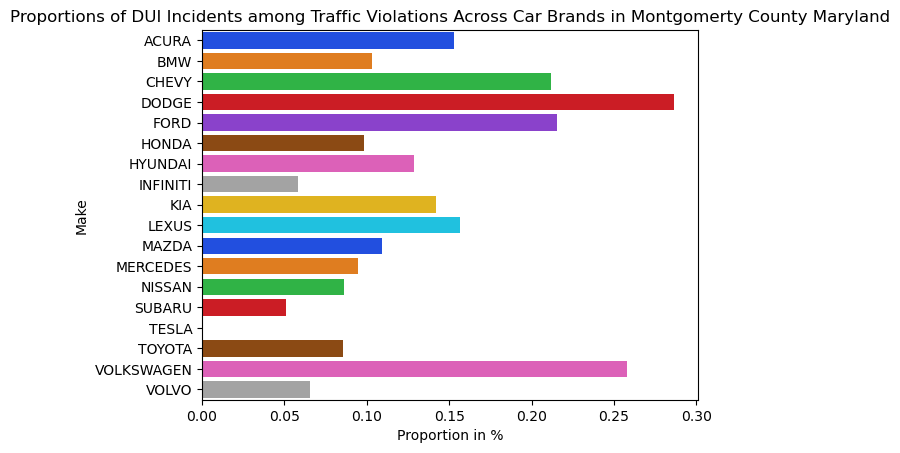

In [15]:
sns.color_palette("tab10")
sns.barplot(data = df_dui, x="Percentage", y = df_dui.index , palette = 'bright' ).set(
    title='Proportions of DUI Incidents among Traffic Violations Across Car Brands in Montgomerty County Maryland'
  , xlabel= 'Proportion in %')



#### Dodge has the highest proportion of DUI's of any make at 0.28%, closely followed by Volkswagen at aroun 0.26% making over twice the median proportion from other makes. This is aligned with the generally reckless behavior associated with the brands and their  sporty young male oriented models like the Dodge Charger/Challenger, as well as the Volkswagen Golf GTI. The next highest proportion makes generally have a larger economy car fleet but do both have cars, the Mustang and Camaro, with similar demographics to the top. The rest of the more consumer economy oriented brands range around 0.08%, however interestingly their more luxury analogues generally have higher proportions, as seen with Toyota v. Lexus, Acura v. Honda, this is certainly explainable by these upscale makes catering to a younger male demographic with more powerful and flashy versions of the base models. Another instance of the numbers representing brand perception, Subaru and Volvo have the lowest proportions and are both known as safety and family oriented makes. 

###  Accidents by Make

In [16]:
pd.crosstab(index=df['Accident'], columns=df['Make'])      

Make,ACURA,BMW,CHEVY,DODGE,FORD,HONDA,HYUNDAI,INFINITI,KIA,LEXUS,MAZDA,MERCEDES,NISSAN,SUBARU,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
Accident,,,,,,,,,,,,,,,,,,
No,73129,52108,167012,60444,168966,273129,66630,21936,27497,42928,36598,62926,140760,37947,2354,325759,37053,14786
Yes,1993,1252,4535,1659,5309,8182,1748,406,643,1079,905,1465,4065,1113,74,9841,919,416


In [17]:
acc = df[(df['Accident'] == 'Yes') ]
pp2 = pd.crosstab(index=acc['Accident'], columns=acc['Make']).sum()#Counts of accidents across makes
print(pp2)
tb2 = ((pp2/AllViolation)*100) #Creates a series with the (#ofAllIncidents/#ofDUIs)*100 for each brand to give the proportion(%)
df_acc = pd.DataFrame(data = tb2, columns =["Percentage"])

Make
ACURA         1993
BMW           1252
CHEVY         4535
DODGE         1659
FORD          5309
HONDA         8182
HYUNDAI       1748
INFINITI       406
KIA            643
LEXUS         1079
MAZDA          905
MERCEDES      1465
NISSAN        4065
SUBARU        1113
TESLA           74
TOYOTA        9841
VOLKSWAGEN     919
VOLVO          416
dtype: int64


In [18]:
print(" Mean Accident Prop: ", tb2.mean(),'\n',"Median Accident Prop: ", tb2.median())
print(" IQR: ", tb2.quantile(0.75)-tb2.quantile(0.25))

 Mean Accident Prop:  2.6033919876325293 
 Median Accident Prop:  2.648304072044401
 IQR:  0.4238994314219844


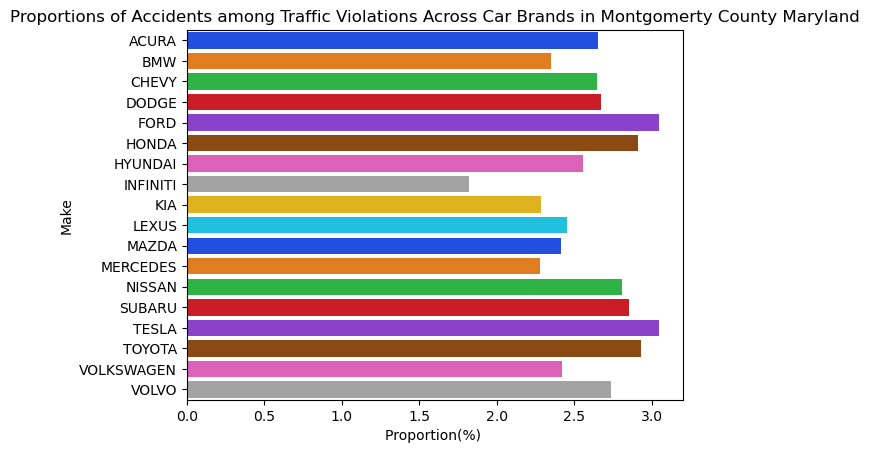

In [19]:
sns.color_palette("tab10")

ax = sns.barplot(data=df_acc, x= 'Percentage',y= df_acc.index   , palette = 'bright' ).set(
    title='Proportions of Accidents among Traffic Violations Across Car Brands in Montgomerty County Maryland'
   ,xlabel= 'Proportion(%) ')


In [20]:
citation = df[(df['Violation Type']=="Citation")]
pd1 = pd.crosstab(index=citation['Violation Type'], columns=df['Make']).sum()      
print(pd1)                        # freq table
perc1 = (pd1/sum(pd1))                # perc table
print(perc1)
prop1 = pd1/AllViolation  # proportion of violations that result in a citation
print(prop1)

Make
ACURA          34597
BMW            25003
CHEVY          81025
DODGE          30440
FORD           82070
HONDA         122358
HYUNDAI        27300
INFINITI       10370
KIA            11378
LEXUS          18308
MAZDA          15777
MERCEDES       29732
NISSAN         65766
SUBARU         15083
TESLA            725
TOYOTA        134829
VOLKSWAGEN     16780
VOLVO           6542
dtype: int64
Make
ACURA         0.047518
BMW           0.034341
CHEVY         0.111285
DODGE         0.041808
FORD          0.112721
HONDA         0.168055
HYUNDAI       0.037496
INFINITI      0.014243
KIA           0.015627
LEXUS         0.025145
MAZDA         0.021669
MERCEDES      0.040836
NISSAN        0.090328
SUBARU        0.020716
TESLA         0.000996
TOYOTA        0.185184
VOLKSWAGEN    0.023047
VOLVO         0.008985
dtype: float64
Make
ACURA         0.460544
BMW           0.468572
CHEVY         0.472320
DODGE         0.490153
FORD          0.470922
HONDA         0.434956
HYUNDAI       0.399251
INFI

In [21]:
warn = df[(df['Violation Type']=="Warning")]
pd2 = pd.crosstab(index=warn['Violation Type'], columns=df['Make']).sum()      
print(pd2)                        # freq table
perc2 = (pd2/sum(pd2))                # perc table
print(perc2)
prop2 = pd2/AllViolation  # proportion of violations that result in a warning
print(prop2)

Make
ACURA          37349
BMW            26638
CHEVY          82017
DODGE          28822
FORD           84728
HONDA         146075
HYUNDAI        37273
INFINITI       11214
KIA            15487
LEXUS          24484
MAZDA          20091
MERCEDES       32260
NISSAN         72904
SUBARU         21796
TESLA           1672
TOYOTA        183939
VOLKSWAGEN     19515
VOLVO           8001
dtype: int64
Make
ACURA         0.043721
BMW           0.031182
CHEVY         0.096009
DODGE         0.033739
FORD          0.099182
HONDA         0.170995
HYUNDAI       0.043632
INFINITI      0.013127
KIA           0.018129
LEXUS         0.028661
MAZDA         0.023518
MERCEDES      0.037763
NISSAN        0.085341
SUBARU        0.025514
TESLA         0.001957
TOYOTA        0.215318
VOLKSWAGEN    0.022844
VOLVO         0.009366
dtype: float64
Make
ACURA         0.497178
BMW           0.499213
CHEVY         0.478102
DODGE         0.464100
FORD          0.486174
HONDA         0.519265
HYUNDAI       0.545102
INFI

## Race Demographics

In [22]:
df_demos = df.sort_values(by = 'Race', ascending=True)
RaceCount = df_demos['Race'].value_counts(sort=True) # value counts
print(RaceCount)


WHITE              550212
BLACK              523587
HISPANIC           376614
OTHER              105328
ASIAN               98848
NATIVE AMERICAN      2977
Name: Race, dtype: int64


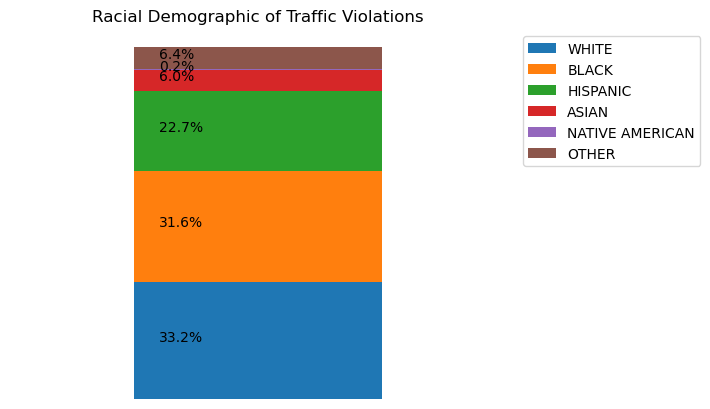

In [23]:
RaceDemo_viz = pd.crosstab(index=(RaceCount.sum()), columns=df['Race'], normalize = "index").reindex(['WHITE', 'BLACK', 'HISPANIC', 'ASIAN', 'NATIVE AMERICAN', 'OTHER'], 
axis="columns")
RaceDemo_viz.plot(kind='bar', stacked=True, rot = 0)
plt.legend(bbox_to_anchor=(1.02, 1))
plt.title("Racial Demographic of Traffic Violations")
plt.axis('off')
for n, x in enumerate([*RaceDemo_viz.index.values]):
    for (proportion, y_loc) in zip(RaceDemo_viz.loc[x],
                                    RaceDemo_viz.loc[x].cumsum()):
                
        plt.text(x=n - 0.2,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=10,
                 )


plt.show()

In [24]:
pd.crosstab(index=df['Race'], columns=df['Make'], normalize = 'columns' )      


Make,ACURA,BMW,CHEVY,DODGE,FORD,HONDA,HYUNDAI,INFINITI,KIA,LEXUS,MAZDA,MERCEDES,NISSAN,SUBARU,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
Race,,,,,,,,,,,,,,,,,,
ASIAN,0.066905,0.074213,0.021172,0.020547,0.022545,0.075944,0.062081,0.052994,0.045203,0.128616,0.056342,0.064108,0.039606,0.076575,0.141269,0.087622,0.048588,0.048546
BLACK,0.319028,0.337256,0.382163,0.408386,0.267273,0.219995,0.402059,0.442664,0.388344,0.359579,0.251180,0.441630,0.396409,0.181900,0.135502,0.295730,0.297772,0.318971
HISPANIC,0.238838,0.153898,0.217701,0.224208,0.287259,0.300127,0.115066,0.158625,0.125409,0.091713,0.198597,0.090261,0.261771,0.195520,0.045305,0.238290,0.149452,0.076240
NATIVE AMERICAN,0.001478,0.001668,0.001714,0.002222,0.001917,0.002122,0.001594,0.001925,0.001350,0.001386,0.001387,0.001367,0.001554,0.001895,0.001236,0.001788,0.002555,0.001579
OTHER,0.058971,0.079760,0.039663,0.044426,0.041848,0.073115,0.056670,0.059619,0.061478,0.082328,0.061542,0.072029,0.058029,0.061009,0.179160,0.081341,0.062177,0.054664
WHITE,0.314781,0.353205,0.337587,0.300211,0.379159,0.328697,0.362529,0.284173,0.378216,0.336378,0.430952,0.330605,0.242631,0.483103,0.497529,0.295229,0.439455,0.500000


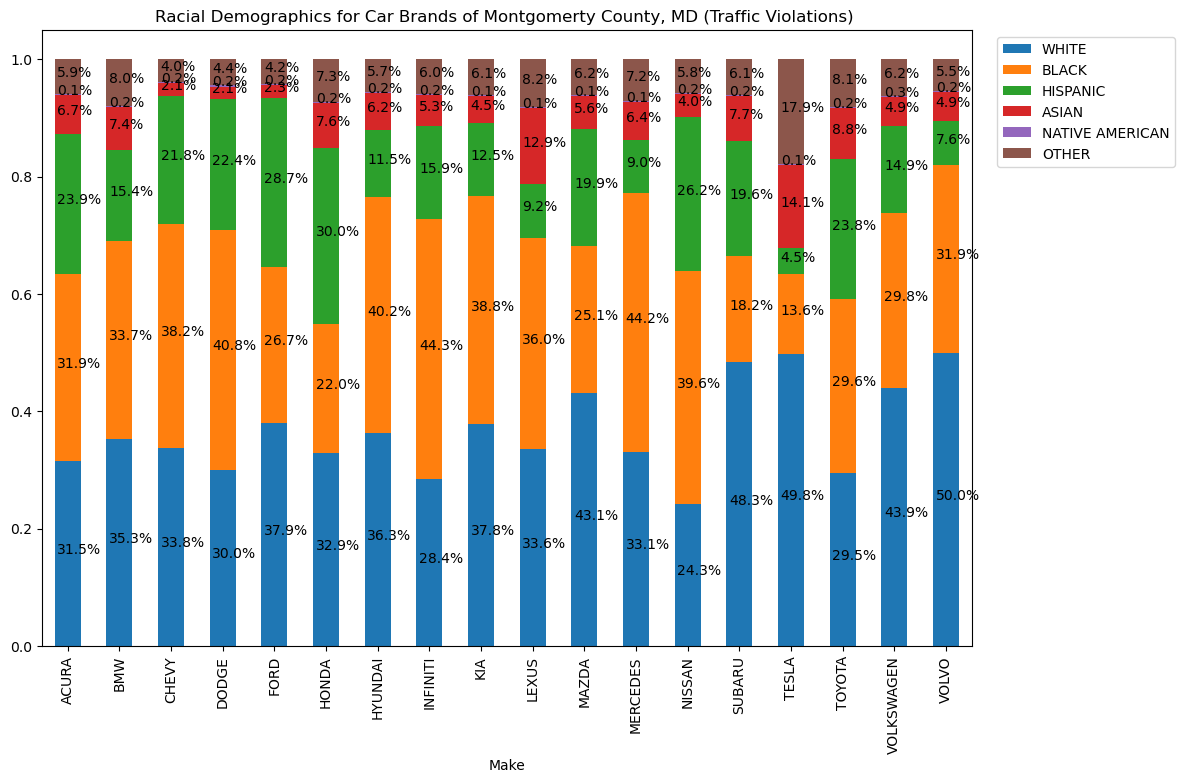

In [25]:
## Graphing Racial Demographics for Car Brands of Montgomerty County, MD Traffic Violations


RaceMake_viz = pd.crosstab(index=df['Make'], columns=df['Race'], normalize = "index").reindex(['WHITE', 'BLACK', 'HISPANIC', 'ASIAN', 'NATIVE AMERICAN', 'OTHER'], 
axis="columns")
RaceMake_viz.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.legend(bbox_to_anchor=(1.02, 1))
plt.title("Racial Demographics for Car Brands of Montgomerty County, MD (Traffic Violations) ")

for n, x in enumerate([*RaceMake_viz.index.values]):
    for (proportion, y_loc) in zip(RaceMake_viz.loc[x],
                                   RaceMake_viz.loc[x].cumsum()):
                
        plt.text(x=n - 0.2,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=10,
                 )


plt.show()

In [26]:
pd.crosstab(index=df['Violation Type'], columns=df['Race'])      

Race,ASIAN,BLACK,HISPANIC,NATIVE AMERICAN,OTHER,WHITE
Violation Type,,,,,,
Citation,35652,234729,193190,1190,38076,225246
ESERO,4812,22753,20713,194,4478,21511
SERO,28,214,225,0,39,251
Warning,58356,265891,162486,1593,62735,303204


### Going further with the Race variable, it would be interesting to see the different rates of Citations vs Warnings between groups to assess discrepancies and possible reasoning.

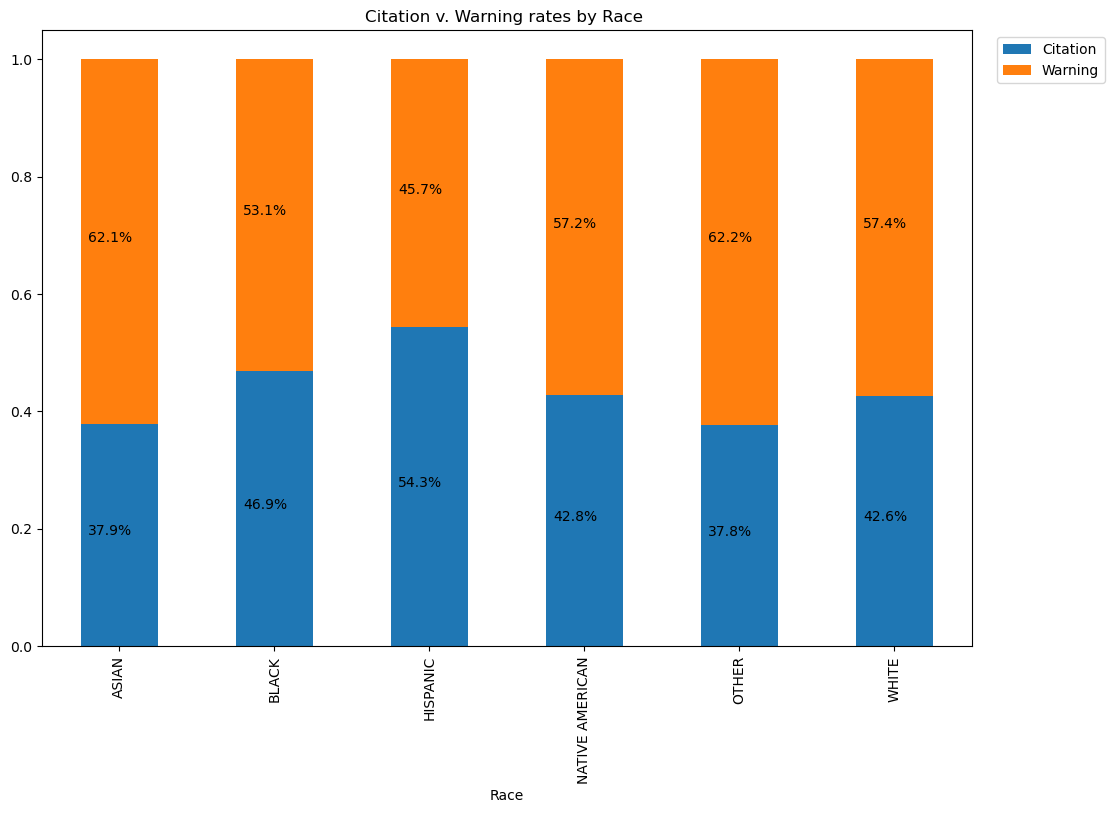

In [27]:
CiteWarn = df[(df['Violation Type']=="Citation")|(df['Violation Type']=="Warning")]
CiteWarn_viz = pd.crosstab(index=CiteWarn['Race'], columns=CiteWarn['Violation Type'],normalize ="index" )

CiteWarn_viz.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.legend(bbox_to_anchor=(1.02, 1))
plt.title("Citation v. Warning rates by Race ")

for n, x in enumerate([*CiteWarn_viz.index.values]):
    for (proportion, y_loc) in zip(CiteWarn_viz.loc[x],
                                   CiteWarn_viz.loc[x].cumsum()):
                
        plt.text(x=n - 0.2,
                 y=(y_loc - proportion) + (proportion / 2),
                 color="black",
                 s=f'{np.round(proportion * 100, 1)}%', 
                 fontsize=10,
                 )


plt.show()

#### As seen in the graph, Hispanic people receive the highest percentage of Citations, while Asians receive the lowest. White and Black rates are similar but with White people receiving about 4% less Citations than Black people. This could possibly be explained by instances of Racial prejudice, or possibly the nature of the violations some groups may be more likely to commit, like excessive speeding, making it less likely to receive a Warning rather than Citation. 

##  Monthly

1     138106
2     143012
3     155245
4     143202
5     146084
6     127169
7     133024
8     132038
9     134256
10    134969
11    136723
12    133738
Name: Month, dtype: int64


Text(0, 0.5, '# of Traffic Violations')

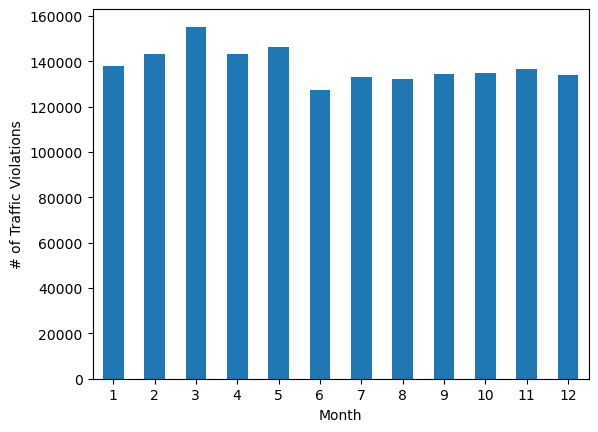

In [28]:
df_sorted = df.sort_values(by = 'Month', ascending=True)
tb2 = df_sorted['Month'].value_counts(sort=False) # value counts
print(tb2)
tb2.plot.bar(rot=0) # bar chart
plt.xlabel("Month")
plt.ylabel("# of Traffic Violations")

## Number of Traffic Violations by Month


Text(0, 0.5, '# of Accidents')

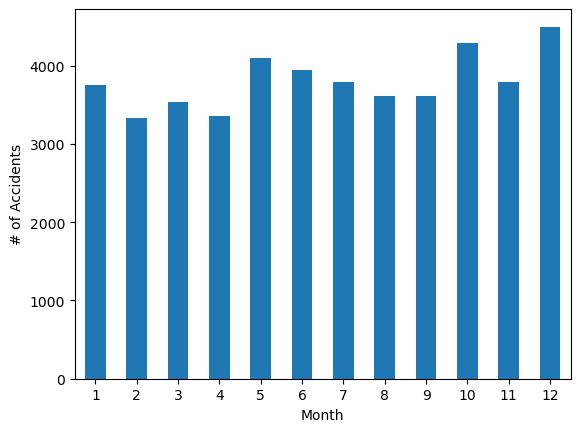

In [29]:
acc1 = df[(df['Accident'] == 'Yes')]
tb4 =pd.crosstab(index=acc1['Accident'], columns=df['Month']).sum()

tb4.plot.bar(rot=0) # bar chart
plt.xlabel("Month")
plt.ylabel("# of Accidents")



#### It appears that accidents peak during December and October, which makes sense as many people are travelling and coming from out of town for the Holiday Season. As well in may there is a spike likely explained by Memorial Day Weekend which has many people travelling and potenially drinking and driving. I was surprised that there were less accidents during the Winter however, as I would've imagined icy conditions to have caused more accidents, but maybe because of that people drive more cautiously, or have less places to go than in Summer or Holiday Season.  

Month
1     166
2     207
3     233
4     179
5     203
6     269
7     108
8     236
9     159
10    139
11    149
12    167
dtype: int64


Text(0, 0.5, '# of DUIs')

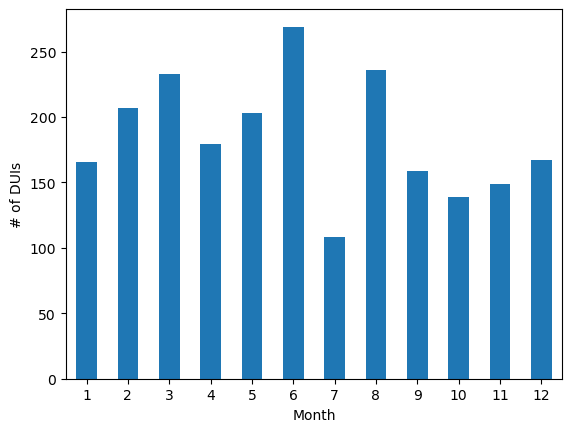

In [30]:
tb5 =pd.crosstab(index=alc['Alcohol'], columns=df['Month']).sum()
print(tb5)

tb5.plot.bar(rot=0) # bar chart
plt.xlabel("Month")
plt.ylabel("# of DUIs")


## Gender

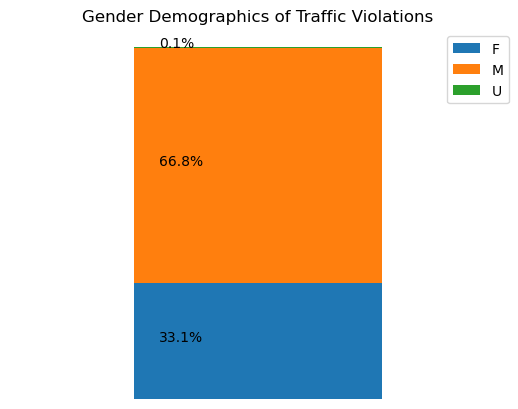

In [31]:
tb7= df['Gender'].value_counts(sort=False) # value counts
GenderDemo_viz = pd.crosstab(index=(tb7.sum()), columns=df['Gender'], normalize = "index")
GenderDemo_viz.plot(kind='bar', stacked=True, rot = 0)
plt.legend(bbox_to_anchor=(1.02, 1))
plt.title("Gender Demographics of Traffic Violations")
plt.axis('off')

for n, x in enumerate([*GenderDemo_viz.index.values]):
    for (proportion, y_loc) in zip(GenderDemo_viz.loc[x],
                                    GenderDemo_viz.loc[x].cumsum()):
                
        plt.text(x=n - 0.2,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=10,
                 )


plt.show()


Gender          F         M
Alcohol                    
Yes      0.256885  0.743115


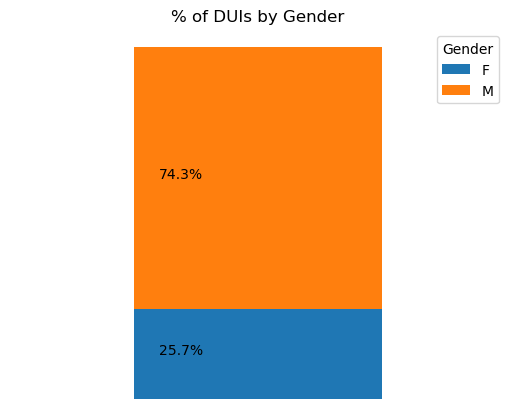

In [33]:
tb9 =pd.crosstab(index=alc['Alcohol'], columns=df['Gender'], normalize = "index")
print(tb9)

tb9.plot.bar(rot=0, stacked = True) # bar chart
plt.title("% of DUIs by Gender")
plt.axis('off')
for n, x in enumerate([*tb9.index.values]):
    for (proportion, y_loc) in zip(tb9.loc[x],
                                    tb9.loc[x].cumsum()):
                
        plt.text(x=n - 0.2,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=10,
                 )


plt.show()

Gender           F         M         U
Accident                              
Yes       0.310631  0.688383  0.000987


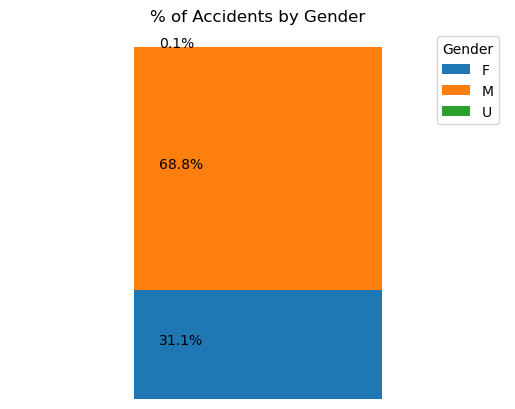

In [34]:
tb6 =pd.crosstab(index=acc['Accident'], columns=df['Gender'], normalize = "index")
print(tb6)

tb6.plot.bar(rot=0, stacked = True) # bar chart
plt.title("% of Accidents by Gender")
plt.axis('off')
for n, x in enumerate([*tb6.index.values]):
    for (proportion, y_loc) in zip(tb6.loc[x],
                                    tb6.loc[x].cumsum()):
                
        plt.text(x=n - 0.2,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=10,
                 )


plt.show()

#### Men appear to much more represented in # of Traffic Violations taking up 66.8% of the distribution. Men also receive about 74.3% of the DUI's. The rates of accidents between Men and Women are about consistent with their distribution in the data as a whole, with men slightly making up a higher percent of accidents in proportion to their total amount. 

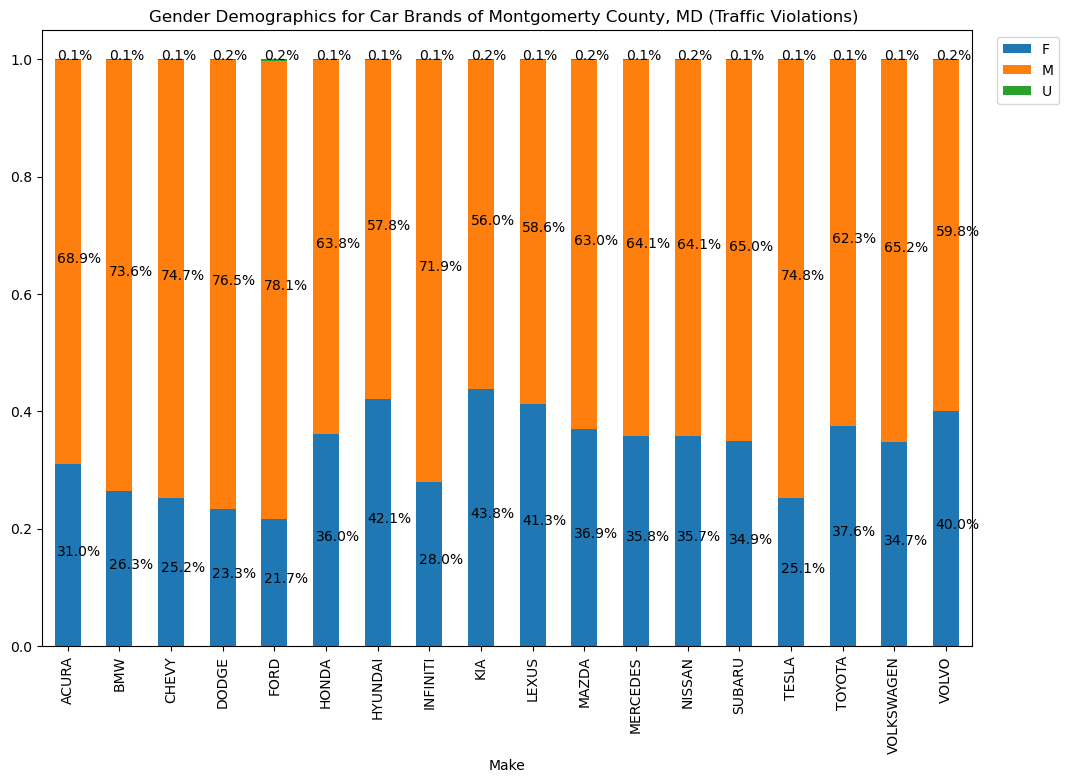

In [35]:
## Graphing Gender Demographics for Car Brands of Montgomerty County, MD Traffic Violations


GenderMake_viz = pd.crosstab(index=df['Make'], columns=df['Gender'], normalize = "index")
GenderMake_viz.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.legend(bbox_to_anchor=(1.02, 1))
plt.title("Gender Demographics for Car Brands of Montgomerty County, MD (Traffic Violations) ")

for n, x in enumerate([*GenderMake_viz.index.values]):
    for (proportion, y_loc) in zip(GenderMake_viz.loc[x],
                                   GenderMake_viz.loc[x].cumsum()):
                
        plt.text(x=n - 0.2,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=10,
                 )


plt.show()